In [4]:
# coding=utf-8

import pandas as pd
import numpy as np
import datetime
from bs4 import BeautifulSoup
import time
from time import sleep
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

In [2]:
def get_browser():
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    br = webdriver.Chrome(options=chrome_options)
    return br


def get_shareholding():
    #for exchange in ["sh", "sz"]:
    #URL = ("http://www.hkexnews.hk/sdw/search/mutualmarket.aspx?t=" + exchange.lower())
    count = 0
    total_df = pd.DataFrame([], columns=["code", "name", "shareholding", "shareholding_percent"])
    
    URL = ("https://www.hkexnews.hk/sdw/search/mutualmarket_c.aspx?t=hk")
    browser = get_browser()
    browser.get(URL)

    today = datetime.date.today()
    start_date = today.replace(year=today.year - 1)
    end_date = today
    date_list = pd.date_range(
        start=start_date, end=end_date, freq="1D", closed="left"
    ).strftime("%Y/%m/%d")

    for date in date_list:
        try:
            js = "document.getElementById('txtShareholdingDate').value='{}';".format(
                date
            )
            browser.execute_script(js)
            browser.find_element(By.ID, "txtShareholdingDate").click()
            browser.find_element(By.ID, "btnSearch").click()

            soup = BeautifulSoup(browser.page_source, "html.parser")
            data = []
            for tr in (
                soup.find("table", {"id": "mutualmarket-result"})
                .find("tbody")
                .findAll("tr")
            ):
                code = (
                    tr.find("td", {"class": "col-stock-code"})
                    .find("div", {"class": "mobile-list-body"})
                    .get_text()
                )
                name = (
                    tr.find("td", {"class": "col-stock-name"})
                    .find("div", {"class": "mobile-list-body"})
                    .get_text()
                )
                shareholding = (
                    tr.find("td", {"class": "col-shareholding"})
                    .find("div", {"class": "mobile-list-body"})
                    .get_text()
                )
                shareholding_percent = (
                    tr.find("td", {"class": "col-shareholding-percent"})
                    .find("div", {"class": "mobile-list-body"})
                    .get_text()
                )

                data.append([code, name, shareholding, shareholding_percent])
            df = pd.DataFrame(data, columns=["code", "name", "shareholding", "shareholding_percent"])

            df["Symbol"] = df["name"].apply(lambda x: x[-7:-1].replace("#", "0"))

            df["shareholding_percent"] = (
                df["shareholding_percent"]
                .apply(lambda x: x[:-1] if len(x) > 0 else np.nan)
                .astype("float64")
            )
            df["shareholding"] = (
                df["shareholding"]
                .apply(lambda x: x.replace(",", ""))
                .astype("float64")
            )

            date = date.replace("/", "-")
            df["Tradedate"] = date
            #del df["code"], df["name"]
            
            total_df = pd.concat([total_df,df], axis=0, join='outer')

            #import pdb; pdb.set_trace()
            print(count)
            count+=1
            sleep(2)
            
        except Exception as er:
            print(er)
    
    browser.close()
    browser.quit()
    return total_df

In [3]:
if __name__ == "__main__":
    df = get_shareholding()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [4]:
df = pd.DataFrame(df)
df

,code,name,shareholding,shareholding_percent,Symbol,Tradedate
0,1,長和,2.978890e+07,0.76,長,2019-12-30
1,2,中電控股,4.572452e+06,0.17,中電控,2019-12-30
2,3,香港中華煤氣,2.613319e+07,0.14,香港中華煤,2019-12-30
3,4,九龍倉集團,1.497983e+06,0.04,九龍倉集,2019-12-30
4,5,匯豐控股,1.564865e+09,7.58,匯豐控,2019-12-30
...,...,...,...,...,...,...
631,9968,匯景控股,8.538000e+06,0.16,匯景控,2020-12-29
632,9983,建業新生活,2.525400e+07,2.02,建業新生,2020-12-29
633,9989,海普瑞,1.720646e+07,7.81,海普,2020-12-29
634,9990,祖龍娛樂,1.482100e+07,1.81,祖龍娛,2020-12-29


In [5]:
df

,code,name,shareholding,shareholding_percent,Symbol,Tradedate
0,1,長和,2.978890e+07,0.76,長,2019-12-30
1,2,中電控股,4.572452e+06,0.17,中電控,2019-12-30
2,3,香港中華煤氣,2.613319e+07,0.14,香港中華煤,2019-12-30
3,4,九龍倉集團,1.497983e+06,0.04,九龍倉集,2019-12-30
4,5,匯豐控股,1.564865e+09,7.58,匯豐控,2019-12-30
...,...,...,...,...,...,...
631,9968,匯景控股,8.538000e+06,0.16,匯景控,2020-12-29
632,9983,建業新生活,2.525400e+07,2.02,建業新生,2020-12-29
633,9989,海普瑞,1.720646e+07,7.81,海普,2020-12-29
634,9990,祖龍娛樂,1.482100e+07,1.81,祖龍娛,2020-12-29


In [6]:
df.to_excel("深港通.xlsx", index=False)#encoding="utf-16", index=False)

In [5]:
check_df = pd.read_excel("深港通.xlsx")

In [6]:
code = 883
check_df.loc[check_df['code']==code][-20:]

,code,name,shareholding,shareholding_percent,Symbol,Tradedate
213227,883,中國海洋石油,692498869,1.54,中國海洋石,2020-12-10
213865,883,中國海洋石油,715499869,1.59,中國海洋石,2020-12-11
214503,883,中國海洋石油,715499869,1.59,中國海洋石,2020-12-12
215141,883,中國海洋石油,715499869,1.59,中國海洋石,2020-12-13
215778,883,中國海洋石油,745361869,1.66,中國海洋石,2020-12-14
216415,883,中國海洋石油,839534869,1.87,中國海洋石,2020-12-15
217052,883,中國海洋石油,888382869,1.98,中國海洋石,2020-12-16
217689,883,中國海洋石油,924544869,2.06,中國海洋石,2020-12-17
218326,883,中國海洋石油,924767869,2.06,中國海洋石,2020-12-18
218963,883,中國海洋石油,924767869,2.06,中國海洋石,2020-12-19


In [7]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from scipy import stats                              #for ploting best-fit line for stock price
from statistics import mean, median
import math
import time
from time import sleep
import datetime
font = {'family' : 'SimSun',
        'weight' : 'bold',
        'size'  : '12'}
plt.rc('font', **font) # pass in the font dict as kwargs
plt.rc('axes',unicode_minus=False)
plt.style.use('ggplot')

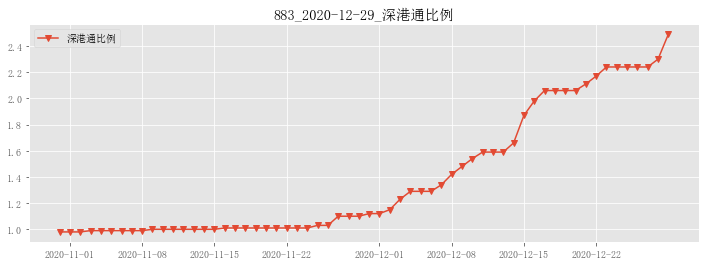

In [8]:
days = 60

ratio = [i for i in check_df.loc[check_df['code']==code][-days:]['shareholding_percent']]
all_dates = check_df.loc[check_df['code']==code][-days:]['Tradedate'].astype('datetime64')
current_date = check_df.loc[check_df['code']==code][-1:]['Tradedate'].astype('datetime64')
dates = [str(i.year)+"-"+str(i.month)+"-"+str(i.day) for i in current_date][:]
today = [str(i.year)+"-"+str(i.month)+"-"+str(i.day) for i in current_date][0]                 #for title use

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))
ax.plot(all_dates, ratio, "v-", label='深港通比例')
ax.set_title(str(code)+'_'+str(today)+"_深港通比例")
ax.legend()
plt.show()

In [9]:
max(ratio)-min(ratio)

1.5100000000000002

In [12]:
set(check_df['code'])

{1,
 2,
 3,
 4,
 5,
 6,
 8,
 10,
 11,
 12,
 14,
 16,
 17,
 19,
 20,
 23,
 27,
 35,
 38,
 41,
 42,
 43,
 45,
 59,
 66,
 69,
 78,
 81,
 83,
 86,
 87,
 95,
 101,
 107,
 109,
 116,
 119,
 120,
 123,
 127,
 135,
 136,
 142,
 144,
 148,
 151,
 152,
 163,
 165,
 168,
 173,
 175,
 177,
 178,
 179,
 187,
 189,
 198,
 200,
 207,
 215,
 220,
 241,
 242,
 245,
 256,
 257,
 267,
 268,
 270,
 272,
 279,
 285,
 288,
 291,
 293,
 295,
 297,
 302,
 303,
 308,
 315,
 316,
 317,
 321,
 322,
 323,
 327,
 330,
 336,
 337,
 338,
 341,
 345,
 347,
 354,
 358,
 363,
 371,
 378,
 384,
 386,
 388,
 390,
 392,
 400,
 410,
 412,
 419,
 425,
 439,
 440,
 451,
 460,
 467,
 468,
 480,
 488,
 489,
 493,
 494,
 496,
 506,
 508,
 511,
 512,
 517,
 520,
 522,
 525,
 530,
 535,
 546,
 547,
 548,
 551,
 552,
 553,
 563,
 564,
 568,
 570,
 576,
 579,
 581,
 582,
 586,
 588,
 590,
 598,
 604,
 606,
 607,
 612,
 631,
 636,
 639,
 656,
 658,
 659,
 665,
 667,
 669,
 670,
 680,
 683,
 686,
 687,
 688,
 691,
 694,
 696,
 697,
 

In [ ]:
宋體	SimSun
黑體	SimHei
微軟雅黑	Microsoft YaHei
微軟正黑體	Microsoft JhengHei
新宋體	NSimSun
新細明體	PMingLiU
細明體	MingLiU
標楷體	DFKai-SB
仿宋	FangSong
楷體	KaiTi
隸書	LiSu
幼圓	YouYuan
華文細黑	STXihei
華文楷體	STKaiti
華文宋體	STSong
華文中宋	STZhongsong
華文仿宋	STFangsong
方正舒體	FZShuTi
方正姚體	FZYaoti
華文彩雲	STCaiyun
華文琥珀	STHupo
華文隸書	STLiti
華文行楷	STXingkai
華文新魏	STXinwei